# Geodesic tutorial

## Load `pybhpt.geo`

In [1]:
from pybhpt.geo import KerrGeodesic
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

## Constructing bound, periodic, timelike geodesics in Kerr

Bound timelike geodesics are defined in terms of the Keplerian-like parameters:

- $a$ : the dimensionless Kerr spin parameter
- $p$ : the dimensionless semilatus rectum
- $e$ : the orbital eccentricty
- $x$ : cosine of the orbital inclination

The class `KerrGeodesics` takes in these orbital parameters as input. Additionally, there is the optional parameter `nsamples` which specifies how many phase-space points are pre-sampled and stored along the geodesic for later computations and classes (e.g., the source integration performed by the `TeukolskyMode` class).

In [2]:
a, p, e, x, nsamples = (0.9, 8., 0.6, 0.9, 2**9)
geo = KerrGeodesic(a, p, e, x, nsamples)

### Accessing orbital constants

Calling the `KerrGeodesic` computes the geodesic solutions and all related frequencies and constants of motion. The original orbital parameters are accessible via class properties

In [3]:
(geo.blackholespin, geo.semilatusrectum, geo.eccentricity, geo.inclination) == geo.orbitalparameters

array([ True,  True,  True,  True])

along with the orbital constants: orbital energy $E$, $z$-component of the orbital angular momentum $L_z$, and Carter constant $Q$,

In [4]:
(geo.orbitalenergy, geo.orbitalangularmomentum, geo.carterconstant) == geo.orbitalconstants

array([ True,  True,  True])

the roots of the radial equation,

In [5]:
geo.radialroots

array([20.        ,  5.        ,  1.43907677,  0.14948052])

the roots of the polar equation,

In [6]:
geo.polarroots

array([13.13628216,  0.43588989])

the frequencies $\Upsilon_\alpha$ with respect to Mino time $\lambda$,

In [7]:
geo.minofrequencies

array([138.1989209 ,   2.45185678,   3.24162659,   3.47835419])

and the fundamental frequencies $\Omega_\alpha$ with respect to coordinate time $t$,

In [8]:
geo.frequencies, geo.timefrequencies

(array([0.0177415 , 0.02345624, 0.02516918]),
 array([0.0177415 , 0.02345624, 0.02516918]))

### Evaluating geodesic solutions

To evaluate the geodesic solutions $x^\mu_p(\lambda)=(t_p,r_p,\theta_p,\phi_p)$ at Mino time $\lambda$, we can simply call the class instance,

In [9]:
la = 10.
geo(la)

array([1.40675551e+03, 5.31917866e+00, 1.33313149e+00, 3.47941508e+01])

One can also evaluate on a grid of $\lambda$ values

In [10]:
la_grid = np.linspace(0, 20, 1000)
geo_grid = geo(la_grid)

And then plot the solutions

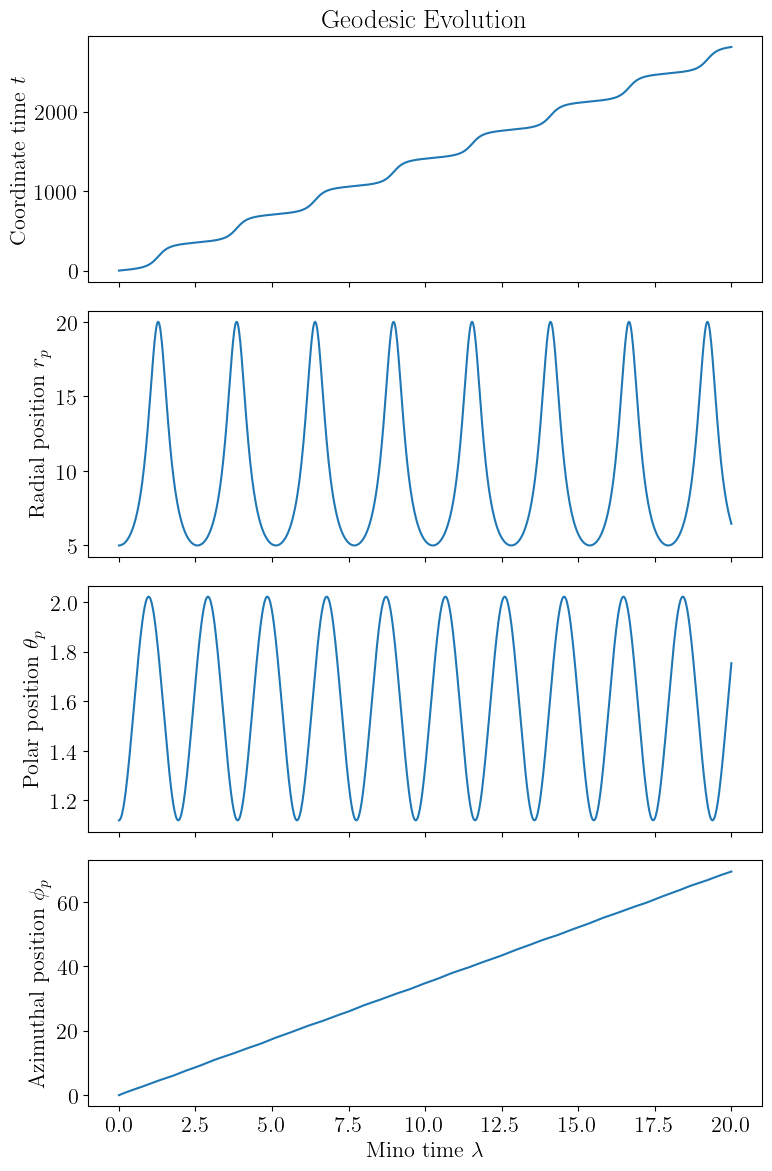

In [11]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 16

fig, axs = plt.subplots(4, 1, figsize=(8, 12), sharex=True)
axs[0].plot(la_grid, geo_grid[0])
axs[0].set_ylabel(r'Coordinate time $t$')
axs[0].set_title(r'Geodesic Evolution')

axs[1].plot(la_grid, geo_grid[1])
axs[1].set_ylabel(r'Radial position $r_p$')

axs[2].plot(la_grid, geo_grid[2])
axs[2].set_ylabel(r'Polar position $\theta_p$')

axs[3].plot(la_grid, geo_grid[3])
axs[3].set_ylabel(r'Azimuthal position $\phi_p$')
axs[3].set_xlabel(r'Mino time $\lambda$')

plt.tight_layout()
plt.show()


One can also get the evolution as a function of coordinate time by first solving for $\lambda(t)$

In [12]:
t_grid = np.linspace(0, 1500, 1000)
la_t_grid = geo.mino_of_t(t_grid)
geo_t_grid = geo(la_t_grid)

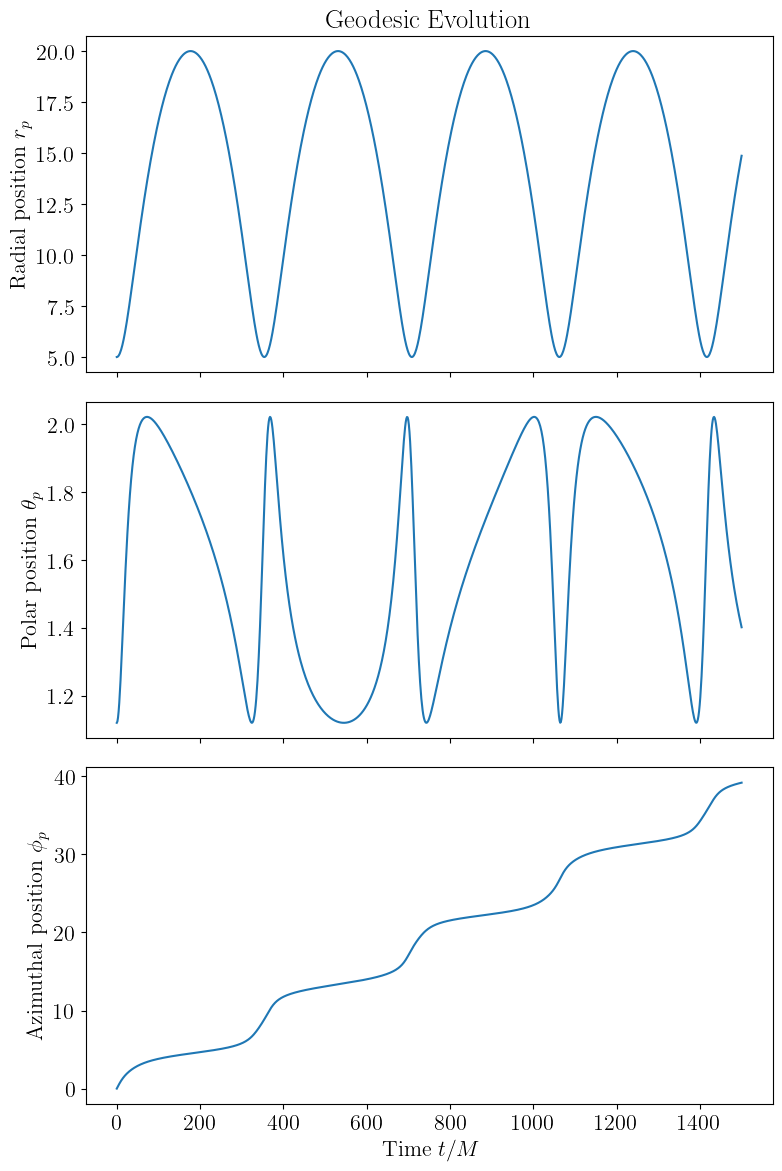

In [13]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 16

fig, axs = plt.subplots(3, 1, figsize=(8, 12), sharex=True)
axs[0].set_title(r'Geodesic Evolution')
axs[0].plot(t_grid, geo_t_grid[1])
axs[0].set_ylabel(r'Radial position $r_p$')

axs[1].plot(t_grid, geo_t_grid[2])
axs[1].set_ylabel(r'Polar position $\theta_p$')

axs[2].plot(t_grid, geo_t_grid[3])
axs[2].set_ylabel(r'Azimuthal position $\phi_p$')
axs[2].set_xlabel(r'Time $t/M$')

plt.tight_layout()
plt.show()
